In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from imutils import paths

In [ ]:
DIRECTORY = r"/content/drive/MyDrive/Data/dataset"
CATEGORIES = ["with_mask", "without_mask"]

In [ ]:
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from keras.applications.mobilenet_v2 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import AveragePooling2D
from keras.layers import Input
from keras.utils import np_utils
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
data = []
labels = []

In [ ]:
for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
    	img_path = os.path.join(path, img)
    	image = load_img(img_path, target_size=(224, 224))
    	image = img_to_array(image)
    	image = preprocess_input(image)

    	data.append(image)
    	labels.append(category)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
print(labels)

['with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask', 'with_mask'

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = np_utils.to_categorical(labels)

In [ ]:
data = np.array(data, dtype= 'float32')
labels = np.array(labels)

In [ ]:
print(data.shape)
print(labels.shape)

(3841, 224, 224, 3)
(3841, 2)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size= 0.2, stratify= labels, random_state= 42)

In [ ]:
print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)

X_train shape (3072, 224, 224, 3)
X_test shape (769, 224, 224, 3)


In [ ]:
aug = ImageDataGenerator(rotation_range= 20, zoom_range= 0.15, width_shift_range= 0.2,
                         height_shift_range= 0.2, shear_range= 0.15, horizontal_flip= True,
                         fill_mode= 'nearest')

In [ ]:
baseModel = MobileNetV2(weights= 'imagenet', include_top= False,
                    input_tensor= Input(shape= (224, 224, 3)))

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size= (7, 7))(headModel)
headModel = Flatten(name= 'flatten')(headModel)
headModel = Dense(128, activation= 'relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation= 'softmax')(headModel)

In [ ]:
model = Model(inputs= baseModel.input, outputs= headModel)

In [ ]:
for layer in baseModel.layers:
  layer.trainable = False

In [ ]:
opt = Adam(learning_rate= 1e-4, decay= 1e-4 / 20)
model.compile(loss= 'binary_crossentropy', optimizer= opt, metrics= ['accuracy'])

In [ ]:
history= model.fit(aug.flow(X_train, y_train, batch_size= 32), epochs= 20, steps_per_epoch= len(X_train) // 32, validation_data= (X_test, y_test), validation_steps= len(X_test) // 32)

Epoch 1/20
96/96 [==============================] - 72s 427ms/step - loss: 0.3870 - accuracy: 0.8792 - val_loss: 0.1661 - val_accuracy: 0.9740
Epoch 2/20
96/96 [==============================] - 39s 407ms/step - loss: 0.1476 - accuracy: 0.9652 - val_loss: 0.0853 - val_accuracy: 0.9805
Epoch 3/20
96/96 [==============================] - 39s 401ms/step - loss: 0.0971 - accuracy: 0.9736 - val_loss: 0.0689 - val_accuracy: 0.9805
Epoch 4/20
96/96 [==============================] - 38s 400ms/step - loss: 0.0825 - accuracy: 0.9779 - val_loss: 0.0511 - val_accuracy: 0.9844
Epoch 5/20
96/96 [==============================] - 38s 400ms/step - loss: 0.0616 - accuracy: 0.9863 - val_loss: 0.0458 - val_accuracy: 0.9844
Epoch 6/20
96/96 [==============================] - 39s 409ms/step - loss: 0.0527 - accuracy: 0.9873 - val_loss: 0.0464 - val_accuracy: 0.9818
Epoch 7/20
96/96 [==============================] - 39s 411ms/step - loss: 0.0565 - accuracy: 0.9837 - val_loss: 0.0428 - val_accuracy: 0.9831

In [ ]:
model.save("/content/drive/MyDrive/Data/mask_detector.model", save_format= "h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
pred = model.predict(X_test, batch_size= 32)
pred = np.argmax(pred, axis= 1)

In [ ]:
pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,

In [ ]:
print(classification_report(y_test.argmax(axis= 1), pred, target_names= lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.98      1.00      0.99       383
without_mask       1.00      0.98      0.99       386

    accuracy                           0.99       769
   macro avg       0.99      0.99      0.99       769
weighted avg       0.99      0.99      0.99       769



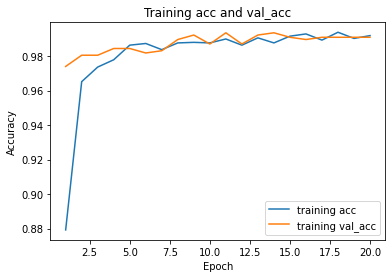

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, label= 'training acc')
plt.plot(epochs, val_acc, label= 'training val_acc')
plt.title('Training acc and val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

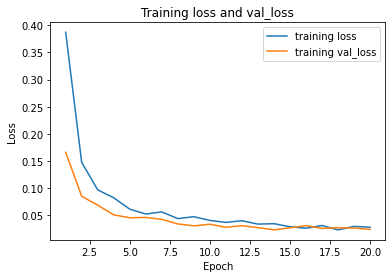

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(epochs, loss, label= 'training loss')
plt.plot(epochs, val_loss, label= 'training val_loss')
plt.title('Training loss and val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.figure()
plt.show()